<a href="https://colab.research.google.com/github/anqi-guo/udacity-dsnd-blog-post/blob/main/calendar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
DATA_PATH = '/content/drive/My Drive/study/DSND/airbnb'

Mounted at /content/drive


In [60]:
import pandas as pd
df_ny = pd.read_csv(f'{DATA_PATH}/data/calendar-202112.csv')
df_sh = pd.read_csv(f'{DATA_PATH}/data/calendar-202112-sh.csv')

df_ny['date'] = pd.to_datetime(df_ny['date'])
df_sh['date'] = pd.to_datetime(df_sh['date'])

df_ny.sort_values(by=['listing_id', 'date'], inplace=True)
df_sh.sort_values(by=['listing_id', 'date'], inplace=True)

In [18]:
df_ny.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,2595,2021-12-05,f,$150.00,$150.00,30.0,1125.0
204,2595,2021-12-06,f,$150.00,$150.00,30.0,1125.0
205,2595,2021-12-07,f,$150.00,$150.00,30.0,1125.0
617,2595,2021-12-08,f,$150.00,$150.00,30.0,1125.0
618,2595,2021-12-09,f,$150.00,$150.00,30.0,1125.0


In [19]:
df_sh.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
38,24963,2021-12-24,f,$480.00,$480.00,3.0,365.0
39,24963,2021-12-25,f,$480.00,$480.00,3.0,365.0
40,24963,2021-12-26,f,$480.00,$480.00,3.0,365.0
41,24963,2021-12-27,f,$480.00,$480.00,3.0,365.0
42,24963,2021-12-28,f,$480.00,$480.00,3.0,365.0


In [20]:
df_ny['listing_id'].nunique(), df_sh['listing_id'].nunique()

(38259, 29165)

# Percentage of available dates

In [23]:
g_ny = df_ny.groupby('listing_id')['available'].value_counts().unstack()
g_ny = g_ny.fillna(0)
g_ny['t_pct'] = g_ny['t'] / 365

In [24]:
g_sh = df_sh.groupby('listing_id')['available'].value_counts().unstack()
g_sh = g_sh.fillna(0)
g_sh['t_pct'] = g_sh['t'] / 365

In [25]:
g_ny.head()

available,f,t,t_pct
listing_id,,,
2595,27.0,338.0,0.926027
3831,171.0,194.0,0.531507
5121,0.0,365.0,1.000000
5136,242.0,123.0,0.336986
5178,173.0,192.0,0.526027


In [45]:
g_ny['t'].value_counts(normalize=True)

0.0      0.367992
365.0    0.036828
364.0    0.016963
338.0    0.011448
90.0     0.007475
           ...   
200.0    0.000261
210.0    0.000235
201.0    0.000209
183.0    0.000183
193.0    0.000157
Name: t, Length: 366, dtype: float64

In [46]:
g_sh['t'].value_counts(normalize=True)

365.0    0.119287
0.0      0.081570
364.0    0.061512
363.0    0.038334
336.0    0.030310
           ...   
105.0    0.000034
100.0    0.000034
252.0    0.000034
224.0    0.000034
124.0    0.000034
Name: t, Length: 359, dtype: float64

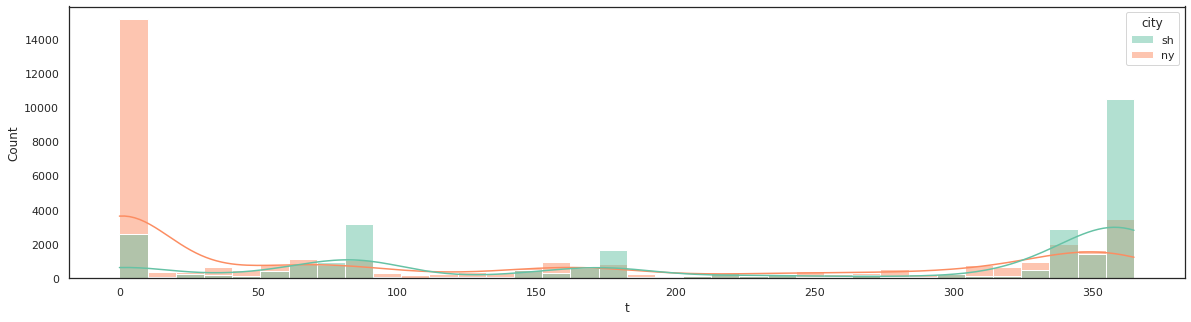

In [42]:
import seaborn as sns

g_sh['city'] = 'sh'
g_ny['city'] = 'ny'

g = g_sh.append(g_ny)

sns.set(rc={'figure.figsize':(20,5)}, style="white", palette="Set2")
sns.histplot(data=g, x="t", hue='city', kde=True, bins=36);

# Price change

In [61]:
from tqdm.notebook import tqdm
tqdm.pandas()

df_ny['price'] = df_ny['price'].fillna(df_ny.groupby('listing_id')['price'].transform(lambda x: x.ffill()))
df_ny['price'] = df_ny['price'].progress_apply(lambda x: float(x[1:].replace(',','')))

  0%|          | 0/13964535 [00:00<?, ?it/s]

In [62]:
df_ny['pct_chg'] = df_ny.groupby('listing_id')['price'].pct_change()

In [63]:
df_ny.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,pct_chg
0,2595,2021-12-05,f,150.0,$150.00,30.0,1125.0,NaN
204,2595,2021-12-06,f,150.0,$150.00,30.0,1125.0,0.0
205,2595,2021-12-07,f,150.0,$150.00,30.0,1125.0,0.0
617,2595,2021-12-08,f,150.0,$150.00,30.0,1125.0,0.0
618,2595,2021-12-09,f,150.0,$150.00,30.0,1125.0,0.0


In [59]:
g_ny.head()

0      NaN
204    0.0
205    0.0
617    0.0
618    0.0
Name: price, dtype: float64

In [ ]:
df_sh.columns

Index(['listing_id', 'date', 'available', 'price', 'adjusted_price',
       'minimum_nights', 'maximum_nights'],
      dtype='object')